## 👉 09-03. 영어/한국어 Word2Vec 실습

## 1. 영어 Word2Vec 만들기

* 파이썬의 gensim 패키지는 Word2Vec을 지원함.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

In [3]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x2dd09020220>)

In [4]:
targetXML = open("ted_en-20160408.xml", 'r', encoding="UTF8")
target_text = etree.parse(targetXML)

parse_text = '\n'.join(target_text.xpath("//content/text()"))

content_text = re.sub(r"\([^)]*\)", '', parse_text)

sent_text = sent_tokenize(content_text)

normalized_text = []
for string in sent_text:
    tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
    normalized_text.append(tokens)
    
result = [word_tokenize(sentence) for sentence in normalized_text]

In [5]:
print("총 샘플의 개수 : {}".format(len(result)))

총 샘플의 개수 : 273424


In [6]:
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


In [7]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, 
                 workers=4, sg=0)

In [8]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.8455365300178528), ('guy', 0.8111951947212219), ('boy', 0.7676870822906494), ('lady', 0.7494388818740845), ('girl', 0.7390204668045044), ('gentleman', 0.7294536232948303), ('soldier', 0.7036815881729126), ('kid', 0.6991907358169556), ('poet', 0.6584346294403076), ('friend', 0.6553536057472229)]


In [9]:
model.wv.save_word2vec_format("eng_w2v")
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v")

In [10]:
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.8455365300178528), ('guy', 0.8111951947212219), ('boy', 0.7676870822906494), ('lady', 0.7494388818740845), ('girl', 0.7390204668045044), ('gentleman', 0.7294536232948303), ('soldier', 0.7036815881729126), ('kid', 0.6991907358169556), ('poet', 0.6584346294403076), ('friend', 0.6553536057472229)]


## 2. 한국어 Word2Vec 만들기 (네이버 영화 리뷰)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
from tqdm import tqdm

In [12]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x2dd65487790>)

In [13]:
train_data = pd.read_table("ratings.txt")

In [14]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [15]:
print(len(train_data))

200000


In [16]:
print(train_data.isnull().values.any())

True


In [17]:
train_data = train_data.dropna(how = "any")
print(train_data.isnull().values.any())

False


In [18]:
print(len(train_data))

199992


In [19]:
train_data["document"] = train_data["document"].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")

In [20]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [21]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도',
             '를','으로','자','에','와','한','하다']

okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data["document"]):
    tokenized_sentence = okt.morphs(sentence, stem=True)
    stopwords_removed_sentence = [word for word in tokenized_sentence 
                                  if not word in stopwords]
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████████████████████████████████████████████████████████████████| 199992/199992 [18:28<00:00, 180.42it/s]


리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


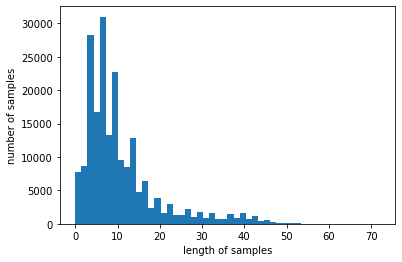

In [22]:
print("리뷰의 최대 길이 :", max(len(review) for review in tokenized_data))
print("리뷰의 평균 길이 :", sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel("length of samples")
plt.ylabel("number of samples")
plt.show()

In [23]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=5,
                workers=4, sg=0)

In [24]:
model.wv.vectors.shape

(16477, 100)

In [25]:
print(model.wv.most_similar("최민식"))

[('한석규', 0.8638125061988831), ('안성기', 0.8516240119934082), ('박중훈', 0.8485455513000488), ('공효진', 0.8438360095024109), ('이정재', 0.8394149541854858), ('최민수', 0.8384565711021423), ('설경구', 0.8360190987586975), ('김갑수', 0.8337478637695312), ('양동근', 0.8333117961883545), ('정재영', 0.8329250812530518)]


In [26]:
print(model.wv.most_similar("히어로"))

[('무협', 0.8751291036605835), ('느와르', 0.8545280694961548), ('호러', 0.8500632047653198), ('물의', 0.8438507914543152), ('슬래셔', 0.8429376482963562), ('블록버스터', 0.8359766602516174), ('첩보', 0.8182362914085388), ('무비', 0.814581036567688), ('물', 0.811898410320282), ('헐리우드', 0.7933678030967712)]


## 3. 사전 훈련된 Word2Vec 임베딩 (Pre-trained Word2Vec embedding) 소개

* 위키피디아 데이터로 구글에서 사전 학습시킨 Word2Vec 모델을 불러올 수 있음.
* 해당 모델에는 300만 개의 Wor2Vec 단어 벡터들(차원 : 300)을 제공함.
* Word2Vec 모델 다운로드 링크 : https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit
